In [3]:
import pandas as pd


In [ ]:
df = pd.read_csv("D:\STUDY\Labmentix Internship Program\Comment toxicity multilabled\data\dataset.csv")

In [17]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [28]:
df.shape

(159571, 10)

In [23]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [19]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


In [20]:
print(df.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [30]:
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]


In [31]:
toxic_words = get_words(df[df[label_cols].sum(axis=1) > 0]["comment_text"].astype(str))


In [32]:
from collections import Counter
import re

def get_words(series):
    words = " ".join(series).lower()
    words = re.findall(r"\b[a-z]{3,}\b", words)  # only words length ≥ 3
    return words

toxic_words = get_words(df[df["toxic"]==1]["comment_text"].astype(str))
nontoxic_words = get_words(df[df[label_cols].sum(axis=1)==0]["comment_text"].astype(str))

toxic_freq = Counter(toxic_words).most_common(20)
nontoxic_freq = Counter(nontoxic_words).most_common(20)

print("Top toxic words:", toxic_freq)
print("Top non-toxic words:", nontoxic_freq)


Top toxic words: [('you', 38553), ('the', 20531), ('and', 15772), ('fuck', 9934), ('your', 9145), ('that', 8238), ('are', 8171), ('this', 5497), ('not', 4834), ('for', 4721), ('have', 4615), ('with', 3931), ('wikipedia', 3678), ('shit', 3622), ('like', 3512), ('what', 3505), ('all', 3467), ('nigger', 3300), ('fucking', 3289), ('suck', 3235)]
Top non-toxic words: [('the', 473751), ('and', 206524), ('you', 177612), ('that', 151572), ('for', 97453), ('this', 91558), ('not', 88329), ('have', 67173), ('are', 63239), ('article', 56088), ('with', 55283), ('your', 53723), ('was', 51834), ('but', 48400), ('wikipedia', 44496), ('page', 44081), ('from', 39376), ('can', 36293), ('talk', 35552), ('about', 34635)]


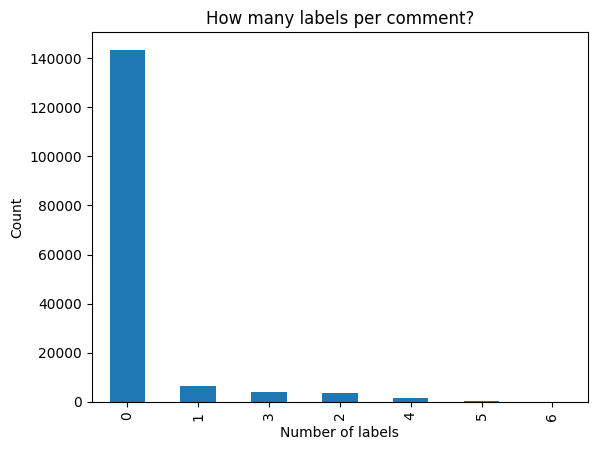

In [33]:
df["label_count"] = df[label_cols].sum(axis=1)
df["label_count"].value_counts().plot(kind="bar")
plt.title("How many labels per comment?")
plt.xlabel("Number of labels")
plt.ylabel("Count")
plt.show()


In [34]:
print("Toxic Example:")
print(df[df["toxic"] == 1]["comment_text"].iloc[0])

print("\nNon-Toxic Example:")
print(df[(df[label_cols].sum(axis=1) == 0)]["comment_text"].iloc[0])


Toxic Example:
COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK

Non-Toxic Example:
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


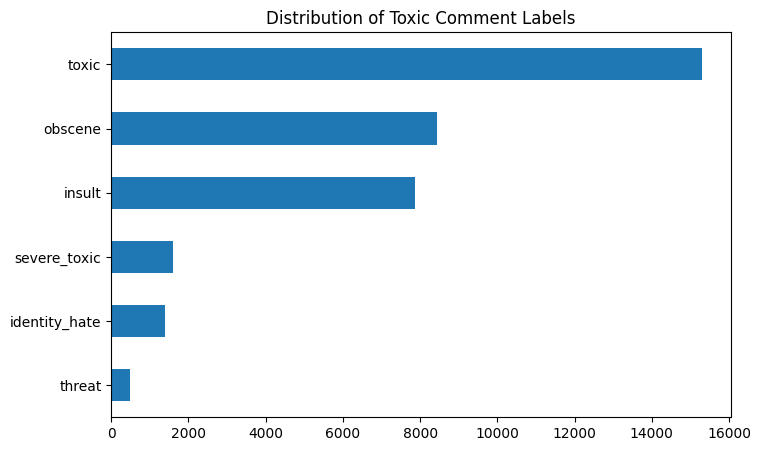

In [35]:
import matplotlib.pyplot as plt

label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

df[label_cols].sum().sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Distribution of Toxic Comment Labels")
plt.show()


toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


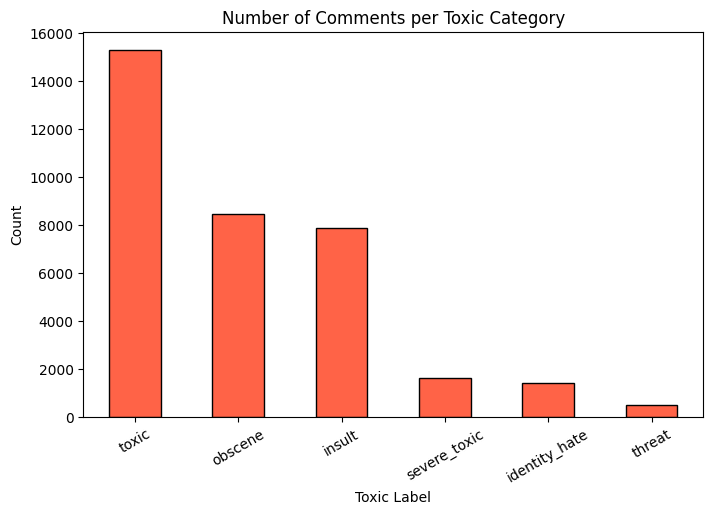

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Toxic label columns
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Count how many times each label appears
toxic_counts = df[label_cols].sum().sort_values(ascending=False)

# Print counts
print(toxic_counts)

# Visualization
plt.figure(figsize=(8,5))
toxic_counts.plot(kind="bar", color="tomato", edgecolor="black")
plt.title("Number of Comments per Toxic Category")
plt.ylabel("Count")
plt.xlabel("Toxic Label")
plt.xticks(rotation=30)
plt.show()
